In [1]:
import sys
sys.path.insert(1, 'C:/Users/Udara/Documents/SmoothingPackage_V1')
import VASmoother as VAS
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [2]:
def moving_average(a,n=3):
    m = int(n/2)
    MA = np.array([])
    for i in range(0,len(a)):
        pl = i-m
        ph=i+m
        if(pl < 0):
            pl = 0
        if(ph > len(a)-1):
            ph = len(a)-1
        MA = np.append(MA,np.average(a[pl:ph+1]))
    return MA

In [3]:
def get_curvature(input_data):
    Rt = input_data[1:]/input_data[:-1]
    Rt_d = Rt[1:] - Rt[:-1]
    Rt_dd = Rt_d[1:] - Rt_d[:-1]
    return Rt_dd*Rt_dd

In [4]:
protein_df = pd.read_csv('sample_high_rt.csv')
y = np.array(protein_df['noise'])[:108]
#protein_df.columns
#Adding noises
y[-1] = y[-1] + 3*y[-1]

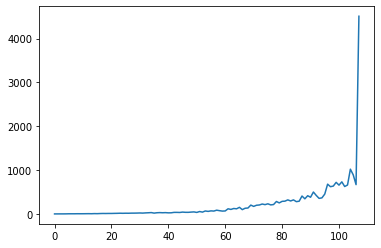

In [5]:
plt.plot(y)

In [6]:
VAS_Itr = VAS.VASmoother()
VAS_Itr.curvature_threshold_1 = 0.0006

index_included, index_excluded = VAS_Itr.seperate_outlier_curvatures(y, 21, 1, 0)
kz_window,kz_itr,VA_smoothed_curve,curvature_arr,smoothing_mods = VAS_Itr.run_va_smoother(y,0,index_included)

SMA_7 = moving_average(y,n=7)

WARNING !! Event after  100 iterations smoothi did not setle.


108
108


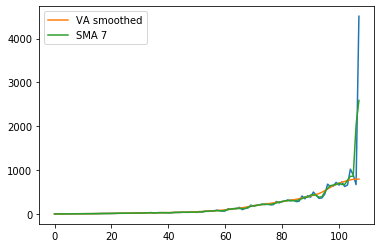

In [7]:
plt.plot(y)
plt.plot(VA_smoothed_curve,label='VA smoothed')
plt.plot(SMA_7,label='SMA 7')
plt.legend()
print(len(y))
print(len(VA_smoothed_curve))

In [8]:
y_2 = np.array(protein_df['noise'])[:108]
#protein_df.columns
#Adding noises
y_2[-1] = y_2[-1] + 3*y_2[-1]
y_2[-2] = y_2[-2] + 3*y_2[-2]



index_included, index_excluded = VAS_Itr.seperate_outlier_curvatures(y_2, 21, 1, 0,)
kz_window,kz_itr,VA_smoothed_curve,curvature_arr,smoothing_mods = VAS_Itr.run_va_smoother(y_2,0,index_included)

SMA_7 = moving_average(y_2,n=7)

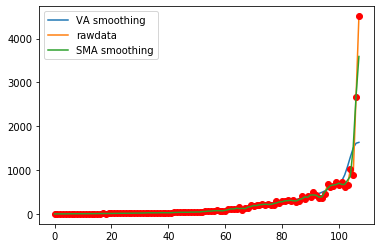

In [9]:
plt.plot(VA_smoothed_curve,label='VA smoothing')
plt.plot(y_2,label='rawdata')
plt.plot(y_2,'ro')
plt.plot(SMA_7,label='SMA smoothing')
plt.legend()
#Now you can see that VA smoother is responding but not as much as the SMA.


WARNING !! Event after  100 iterations smoothi did not setle.
WARNING !! Event after  100 iterations smoothi did not setle.


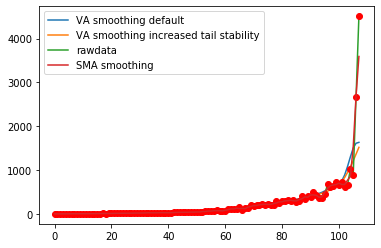

In [10]:
#There is a hyperparameter you can control how much it is responding to one data point. 
#By default that hyperparameter is VAS_Itr.mirror_padding_length = 1
#Lets see what happen when I increase it to 2
VAS_Itr.mirror_padding_length = 2 
index_included, index_excluded = VAS_Itr.seperate_outlier_curvatures(y_2, 21, 1, 0,)
kz_window,kz_itr,VA_smoothed_curve_2,curvature_arr,smoothing_mods = VAS_Itr.run_va_smoother(y_2,0,index_included)

plt.plot(VA_smoothed_curve,label='VA smoothing default')
plt.plot(VA_smoothed_curve_2,label='VA smoothing increased tail stability')
plt.plot(y_2,label='rawdata')
plt.plot(y_2,'ro')
plt.plot(SMA_7,label='SMA smoothing')
plt.legend()
#Now you can see it is responding less you can make it even more non responsive


In [ ]:
#Now I am going to have the same hyperparameter but adding a step at the end with 5 data points
#Step is 3*y_step[-1]
y_step = np.array(protein_df['noise'])[:108]
y_step[-1] = y_step[-1]+3*y_step[-1]
y_step[-2] = y_step[-2]+3*y_step[-1]
y_step[-3] = y_step[-3]+3*y_step[-1]
y_step[-4] = y_step[-4]+3*y_step[-1]
VAS_Itr.mirror_padding_length = 2 
index_included, index_excluded = VAS_Itr.seperate_outlier_curvatures(y_2, 21, 1, 0,)
kz_window,kz_itr,VA_smoothed_curve_step,curvature_arr,smoothing_mods = VAS_Itr.run_va_smoother(y_2,0,index_included)
SMA_step = moving_average(y_step,n=7)

plt.plot(VA_smoothed_curve_step,label='VA smoothed')
plt.plot(SMA_step,label='SMA smoothed')
plt.plot(y_step,label='data')
plt.legend()

WARNING !! Event after  100 iterations smoothi did not setle.
